In [1]:
# Correlation analysis of Economial data and sentiment data

In [2]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import csv
import datetime as dt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import numpy as np
import math
import csv
import pandas as pd

import matplotlib as mpl
from sklearn.preprocessing import MinMaxScaler

Get Speeches and calculate polarity and subjectivity

In [3]:
with open('speeches_clean.csv', newline = '') as file:
    reader = csv.reader(file)
    data = list(reader)

df = pd.DataFrame(data)
df.columns = ['Title', 'Date', 'Text']

In [4]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['Polarity'] = df['Text'].apply(pol)
df['Subjectivity'] = df['Text'].apply(sub)

Get Economic Data

In [5]:
gdp = pd.read_csv(r"US_Economical_Data/GDP.csv", sep=";", decimal=",")
homeprices = pd.read_csv(r"US_Economical_Data/HOMEPRICES.csv", sep=";", decimal=",")
sp_500 = pd.read_csv(r"US_Economical_Data/INDEX_US_S&P.csv", sep=";", decimal=",")
unrate = pd.read_csv(r"US_Economical_Data/UNRATE.csv", sep=";", decimal=",")

x = [dt.datetime.strptime(d,'%d/%m/%Y').date() for d in gdp.iloc[:,0]]
x2 = [dt.datetime.strptime(d,'%d/%m/%Y').date() for d in homeprices.iloc[:,0]]
x3 = [dt.datetime.strptime(d,'%d/%m/%Y').date() for d in sp_500.iloc[:,0]]
x4 = [dt.datetime.strptime(d,'%d/%m/%Y').date() for d in unrate.iloc[:,0]]

In [6]:
# Scaling of the data between zero and one. 

# Usage of minmax scaler: 
scaler = MinMaxScaler()

# Scaling of data
gdp[["GDP_Scaled"]] = scaler.fit_transform(gdp[["GDP"]])
homeprices[["CSUSHPINSA_Scaled"]] = scaler.fit_transform(homeprices[["CSUSHPINSA"]])
sp_500[["Open Price_Scaled"]] = scaler.fit_transform(sp_500[["Open Price"]])
unrate[["UNRATE (%)_Scaled"]] = scaler.fit_transform(unrate[["UNRATE (%)"]])


In [7]:
merged_df = gdp.merge( homeprices,how='left', on='Date') # where the dates are the same
merged_df = merged_df.merge(sp_500,how='left', on='Date')
merged_df = merged_df.merge(unrate,how='left', on='Date')
merged_df.head()

,Date,GDP,GDP_Scaled,CSUSHPINSA,CSUSHPINSA_Scaled,Open Price,Open Price_Scaled,UNRATE (%),UNRATE (%)_Scaled
0,01/01/2008,14706.54,0.068159,171.079,0.731725,1447.16,0.491354,5.0,0.056604
1,01/04/2008,14865.70,0.101507,167.324,0.657637,1340.94,0.419604,5.0,0.056604
2,01/07/2008,14899.00,0.108484,165.714,0.625871,1266.79,0.369517,5.8,0.207547
3,01/10/2008,14608.21,0.047556,159.163,0.496616,1154.70,0.293802,6.5,0.339623
4,01/01/2009,14430.90,0.010405,149.361,0.303218,904.61,0.124870,7.8,0.584906


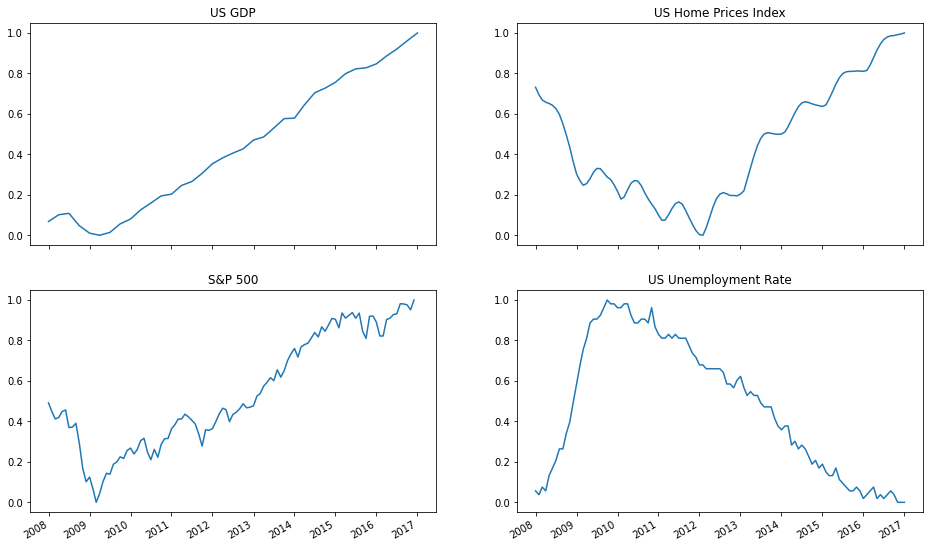

In [8]:
fig, axs = plt.subplots(2,2, figsize = (16, 10), sharex=True)  # Create a figure containing a single axes.
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
axs[0,0].plot(x, gdp.iloc[:,2]);  # Plot some data on the axes.
axs[0,0].set_title("US GDP")
axs[0,1].plot(x2, homeprices.iloc[:,2]);
axs[0,1].set_title("US Home Prices Index")
axs[1,0].plot(x3, sp_500.iloc[:,2]);
axs[1,0].set_title("S&P 500")
axs[1,1].plot(x4, unrate.iloc[:,2]);
axs[1,1].set_title("US Unemployment Rate")
fig.autofmt_xdate()

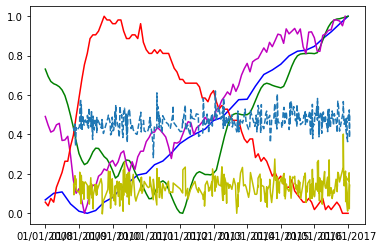

In [9]:
fig, ax = plt.subplots()
ax.plot(x, gdp.iloc[:,2], 'b');  # Plot some data on the axes.
ax.plot(x2, homeprices.iloc[:,2],'g');
ax.plot(x3, sp_500.iloc[:,2],'m');
ax.plot(x4, unrate.iloc[:,2],'r');
dates = [dt.datetime.strptime(d,'%d %b %Y').date() for d in df['Date']]
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
ax.plot(dates, df['Polarity'], 'y')
ax.plot(dates, df['Subjectivity'], '--')
plt.show()

In [10]:
df2 = df.copy()
test = [dt.datetime.strptime(d, "%d %b %Y") for d in df['Date']]
test3 = [dt.datetime.strftime(t, "%m/%Y") for t in test]
test2 = [dt.datetime.strptime(d, "%d %b %Y") for d in df['Date']]

test4 = pd.DataFrame(test3, columns= ['Date_conv'])
# test2 = pd.DataFrame(test2, columns=['Date_conv1'])

df2 = pd.concat([df2, test4], axis='columns') # where the dates are the same
# df2 = pd.concat([df2, test2], axis='columns') # where the dates are the same
# merged_df = merged_df.merge(unrate,how='left', on='Date')
df2 = df2.drop(['Date'], axis=1)
df2.rename(columns={'Date_conv': 'Date'}, inplace=True)
df2.head(10)

,Title,Text,Polarity,Subjectivity,Date
0,President-Elect Victory Speech,ll dream alive time still power democracy toni...,0.146923,0.436356,11/2008
1,First President-Elect Press Conference,irectly audio morning woke sobering news state...,0.093936,0.420103,11/2008
2,Global Climate Summit Prerecorded Speech,g world urgent climate change science beyond d...,0.190776,0.453152,11/2008
3,Economic Team Announcement Speech,ed text version directly audio news past week ...,0.147082,0.342789,11/2008
4,Economic Recovery Advisory Board Announcement,crisis historic moment nation history old way...,0.176241,0.356387,11/2008
5,Security Team Announcement Speech,morning everybody hope wonderful thanksgiving ...,0.146528,0.435752,12/2008
6,Commerce Secretary Announcement,e another key member team nominee secretary co...,0.115682,0.417675,12/2008
7,Remarks After Meeting with Economic Team,c team message meeting today one comes surpris...,0.106369,0.438431,01/2009
8,George Mason University Speech,ied text version directly audio let begin maso...,0.098443,0.459377,01/2009
9,Intelligence Community Leadership Team,thenticity certified text version directly aud...,0.208565,0.502465,01/2009


In [11]:
merged_df2= merged_df.copy()

merged_df2['Date'] = [dt.datetime.strptime(t, "%d/%m/%Y") for t in merged_df2['Date'] ]
merged_df2['Date']= [dt.datetime.strftime(t, "%m/%Y") for t in merged_df2['Date'] ]
merged_df2 = merged_df2.merge(df2,how='inner', on='Date')
merged_df3 = merged_df2.copy()
merged_df3= merged_df3.drop(['GDP', 'CSUSHPINSA', 'Open Price', 'UNRATE (%)', 'Title', 'Text'], axis=1)
merged_df3.head(5)
# Data Export to R
transposed = merged_df3.T
transposed.to_csv(r'C:\Users\Theresa\OneDrive - KU Leuven\Documents\Studium_KUL\Semester_2\Modern Data Analytics\Project\merged_df3_transposed.xlsx')

In [12]:
merged_df3

,Date,GDP_Scaled,CSUSHPINSA_Scaled,Open Price_Scaled,UNRATE (%)_Scaled,Polarity,Subjectivity
0,01/2009,0.010405,0.303218,0.12487,0.584906,0.106369,0.438431
1,01/2009,0.010405,0.303218,0.12487,0.584906,0.098443,0.459377
2,01/2009,0.010405,0.303218,0.12487,0.584906,0.208565,0.502465
3,01/2009,0.010405,0.303218,0.12487,0.584906,0.108106,0.580250
4,01/2009,0.010405,0.303218,0.12487,0.584906,0.057935,0.475688
...,...,...,...,...,...,...,...
119,01/2017,1.000000,1.000000,NaN,0.000000,0.169369,0.471499
120,01/2017,1.000000,1.000000,NaN,0.000000,0.205588,0.483262
121,01/2017,1.000000,1.000000,NaN,0.000000,0.023106,0.524621
122,01/2017,1.000000,1.000000,NaN,0.000000,0.127556,0.384575


In [13]:
# read standardized data in
data_standardized  = pd.read_csv(r"export.csv", sep=";", decimal=".")

In [14]:
concatenated_df = pd.concat([merged_df3, data_standardized], axis='columns') # where the dates are the same
concatenated_df.head(10)

,Date,GDP_Scaled,CSUSHPINSA_Scaled,Open Price_Scaled,UNRATE (%)_Scaled,Polarity,Subjectivity,gdp,homeprices,price,unrate
0,01/2009,0.010405,0.303218,0.124870,0.584906,0.106369,0.438431,0.000000,0.000000,0.000000,0.000000
1,01/2009,0.010405,0.303218,0.124870,0.584906,0.098443,0.459377,0.000000,0.000000,0.000000,0.000000
2,01/2009,0.010405,0.303218,0.124870,0.584906,0.208565,0.502465,0.000000,0.000000,0.000000,0.000000
3,01/2009,0.010405,0.303218,0.124870,0.584906,0.108106,0.580250,0.000000,0.000000,0.000000,0.000000
4,01/2009,0.010405,0.303218,0.124870,0.584906,0.057935,0.475688,0.000000,0.000000,0.000000,0.000000
5,01/2009,0.010405,0.303218,0.124870,0.584906,0.048209,0.430440,0.000000,0.000000,0.000000,0.000000
6,01/2009,0.010405,0.303218,0.124870,0.584906,0.192578,0.550168,-0.010405,-0.047728,-0.080788,0.226415
7,04/2009,0.000000,0.255490,0.044082,0.811321,0.142082,0.447324,0.000000,0.000000,0.000000,-0.226415
8,04/2009,0.000000,0.255490,0.044082,0.811321,0.109331,0.497141,0.000000,0.000000,0.000000,0.000000
9,04/2009,0.000000,0.255490,0.044082,0.811321,0.075607,0.454513,0.000000,0.000000,0.000000,0.000000


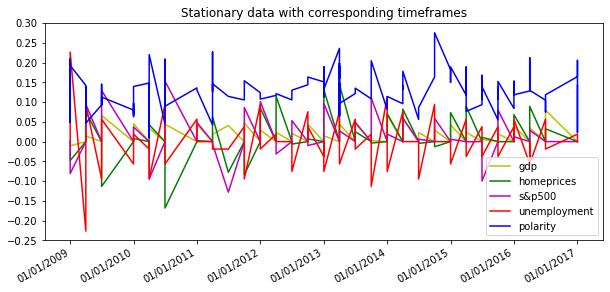

In [17]:
d = [dt.datetime.strptime(d,'%m/%Y').date() for d in concatenated_df.iloc[:,0]]
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [20,6]

ax.plot(d, concatenated_df.iloc[:,7], 'y', label='gdp');  # Plot some data on the axes.
ax.plot(d,concatenated_df.iloc[:,8],'g', label='homeprices');
ax.plot(d, concatenated_df.iloc[:,9],'m', label='s&p500');
ax.plot(d, concatenated_df.iloc[:,10],'r', label='unemployment');
ax.get_yaxis().tick_left()
ax.set_yticks([-0.25,-0.2, -0.15, -0.1, -0.05, 0,0.05 ,0.1, 0.15, 0.2, 0.25, 0.3]) 
ax.set_ylim(-0.25, 0.30)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))

plt.xticks(rotation=30, ha='right')
ax.plot(d, concatenated_df.iloc[:,5], 'b', label='polarity') # Polarity
# ax.plot(d, concatenated_df.iloc[:,6], '--', label = 'subjectivity') # Subjectivity
plt.legend()
plt.title("Stationary data with corresponding timeframes")
plt.show()

# jumps because of less data

In [16]:
# correlations between stationary data
concatenated_df1=concatenated_df.iloc[:,5:12]
concatenated_df1
corrs= concatenated_df1.corr()
corrs

,Polarity,Subjectivity,gdp,homeprices,price,unrate
Polarity,1.000000,0.367490,0.074531,-0.009504,-0.028521,-0.060486
Subjectivity,0.367490,1.000000,-0.006063,0.124052,-0.108878,0.095836
gdp,0.074531,-0.006063,1.000000,0.187048,0.371433,-0.247634
homeprices,-0.009504,0.124052,0.187048,1.000000,-0.032365,-0.138813
price,-0.028521,-0.108878,0.371433,-0.032365,1.000000,-0.181354
unrate,-0.060486,0.095836,-0.247634,-0.138813,-0.181354,1.000000
